# Thông tin
1. **MSSV:** 22521586
2. **Họ Tên:** Trần Võ Lâm Trường
3. **Bài tập:** Bài tập 7
4. **Ngày thực hiện:** 22/5/2024  



In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [ ]:
baitap7 = '/gdrive/MyDrive/UIT/Semester 4/[CS231] Computer Vision/Assignment/CS231.O21.2/Baitap/Baitap7/images/'

# Yêu cầu 1

In [ ]:
def key_point(path_1, path_2):
  img1 = cv2.imread(path_1, 0)
  img2 = cv2.imread(path_2, 0)

  orb = cv2.ORB_create()

  kp1, des1 = orb.detectAndCompute(img1, None)
  kp2, des2 = orb.detectAndCompute(img2, None)

  img1_with_kp = cv2.drawKeypoints(img1, kp1, None, color=(0, 255, 0), flags=0)
  img2_with_kp = cv2.drawKeypoints(img2, kp2, None, color=(0, 255, 0), flags=0)

  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.title('Keypoints in Image 1')
  plt.imshow(img1_with_kp)
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title('Keypoints in Image 2')
  plt.imshow(img2_with_kp)
  plt.axis('off')

  plt.show()

In [ ]:
def match_key_point (img_1, img_2):
  # Read the images in color
  img1 = cv2.imread(img_1)  # Color image
  img2 = cv2.imread(img_2)  # Color image

  # Convert to grayscale for keypoint detection
  gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

  # Initialize the ORB detector
  orb = cv2.ORB_create()

  # Detect keypoints and compute the descriptors with ORB for both images
  kp1, des1 = orb.detectAndCompute(gray1, None)
  kp2, des2 = orb.detectAndCompute(gray2, None)

  # Create BFMatcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

  # Match descriptors
  matches = bf.match(des1, des2)

  # Sort them in the order of their distance
  matches = sorted(matches, key=lambda x: x.distance)

  # Draw matches
  img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

  # Convert BGR image to RGB for displaying with Matplotlib
  img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

  # Display the matched keypoints
  plt.figure(figsize=(16, 8))
  plt.imshow(img_matches)
  plt.title('Keypoints Matches between Image 1 and Image 2')
  plt.axis('off')
  plt.show()


## cow1.jpg và cow2.jpg

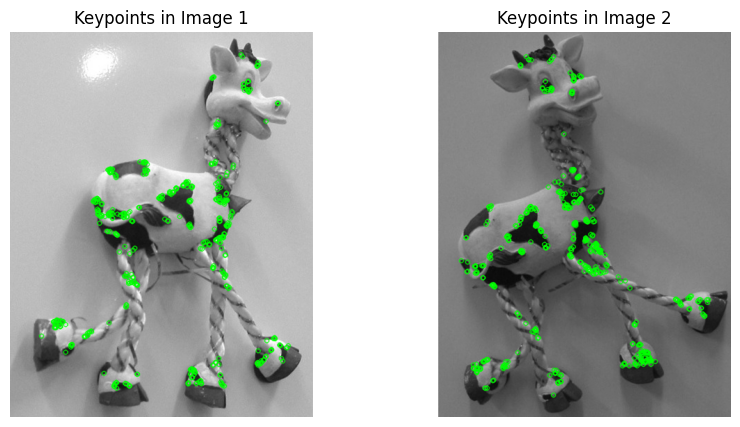

In [ ]:
img_1 = os.path.join(baitap7, 'cow1.jpg')
img_2 = os.path.join(baitap7, 'cow2.jpg')

key_point(img_1, img_2)

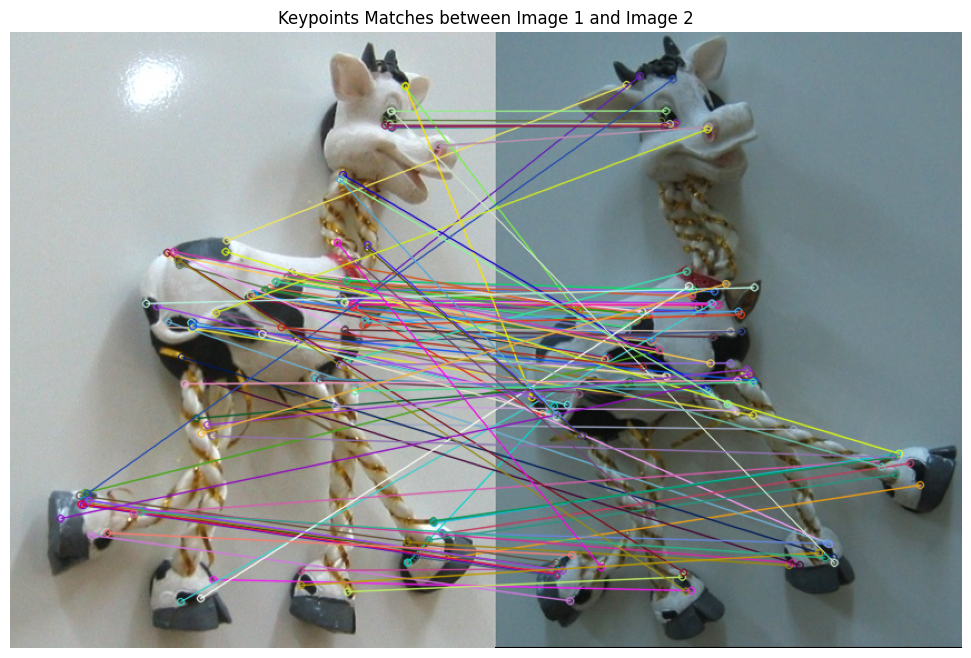

In [ ]:
match_key_point(img_1, img_2)

## match1.jpg và match2.jpg

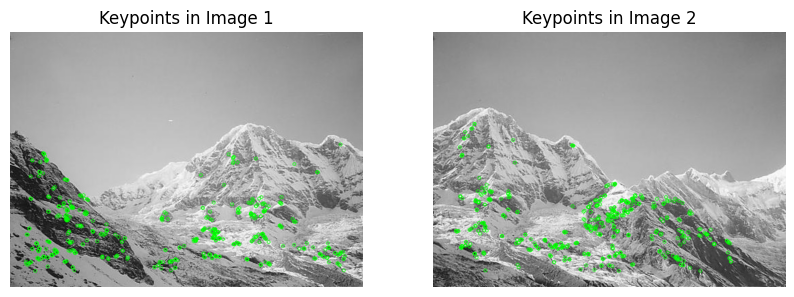

In [ ]:
img_3 = os.path.join(baitap7, 'match1.jpg')
img_4 = os.path.join(baitap7, 'match2.jpg')

key_point(img_3, img_4)

In [ ]:
match_key_point(img_3, img_4)

## graf_img1.jpg và graf_img5.jpg

In [ ]:
img_5 = os.path.join(baitap7, 'graf_img1.jpg')
img_6 = os.path.join(baitap7, 'graf_img5.jpg')

key_point(img_5, img_6)

In [ ]:
match_key_point(img_5, img_6)

# Yêu cầu 2

In [ ]:
img_7 = os.path.join(baitap7, 'butterfly.jpg')
img_8 = os.path.join(baitap7, 'home.jpg')
img_9 = os.path.join(baitap7, 'simple.jpg')

## BRIEF

In [ ]:
def draw_key_point_BRIEF (img_path):
  # Đọc ảnh
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

  # Khởi tạo đối tượng BRIEF
  brief = cv2.BRISK_create()

  # Tìm keypoints và descriptor
  keypoints, descriptors = brief.detectAndCompute(img, None)

  # Tạo một ảnh mới để vẽ keypoints
  img_with_keypoints = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

  # Vẽ mỗi keypoint như là một đường tròn
  for kp in keypoints:
      x, y = kp.pt
      cv2.circle(img_with_keypoints, (int(x), int(y)), 1, (0, 255, 0), 5)  # Điều chỉnh kích thước vòng tròn bằng tham số cuối cùng

  # Hiển thị ảnh và chờ nhấn phím bất kỳ để đóng cửa sổ
  cv2_imshow(img_with_keypoints)

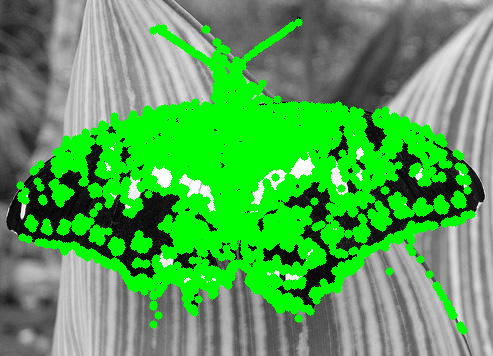

In [ ]:
draw_key_point_BRIEF(img_7)

In [ ]:
draw_key_point_BRIEF(img_8)

In [ ]:
draw_key_point_BRIEF(img_9)

## ORB

In [ ]:
def draw_key_point_orb(img_path):
    # Đọc ảnh
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Khởi tạo đối tượng ORB
    orb = cv2.ORB_create()

    # Tìm keypoints và descriptor
    keypoints, descriptors = orb.detectAndCompute(img, None)

    # Tạo một ảnh mới để vẽ keypoints
    img_with_keypoints = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Vẽ mỗi keypoint như là một đường tròn
    for kp in keypoints:
        x, y = kp.pt
        cv2.circle(img_with_keypoints, (int(x), int(y)), 1, (0, 255, 0), 5)  # Điều chỉnh kích thước vòng tròn bằng tham số cuối cùng

    # Hiển thị ảnh và chờ nhấn phím bất kỳ để đóng cửa sổ
    cv2_imshow(img_with_keypoints)

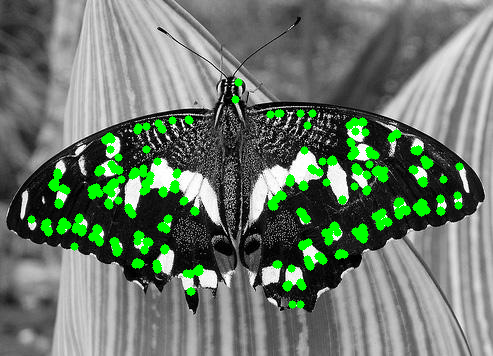

In [ ]:
draw_key_point_orb(img_7)

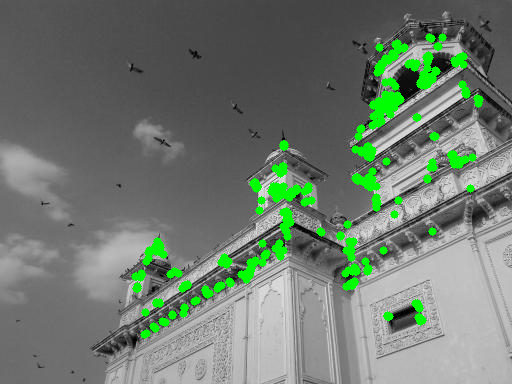

In [ ]:
draw_key_point_orb(img_8)

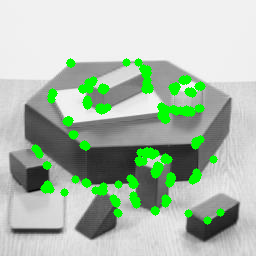

In [ ]:
draw_key_point_orb(img_9)

# Yêu cầu 3

In [ ]:
def feature_matching(left_img_path, right_img_path, descriptor_type='BRIEF', matcher_type='BF'):
    # Đọc ảnh và chuyển đổi sang ảnh grayscale
    left_img = cv2.imread(left_img_path, cv2.IMREAD_GRAYSCALE)
    right_img = cv2.imread(right_img_path, cv2.IMREAD_GRAYSCALE)

    # Khởi tạo đối tượng detector và descriptor
    if descriptor_type == 'BRIEF':
        detector = cv2.ORB_create()
        descriptor = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    elif descriptor_type == 'ORB':
        detector = cv2.ORB_create()
        descriptor = cv2.ORB_create()

    # Tìm điểm đặc trưng và mô tả cho ảnh trái và ảnh phải
    keypoints_left, descriptors_left = detector.detectAndCompute(left_img, None)
    keypoints_right, descriptors_right = detector.detectAndCompute(right_img, None)

    # Chọn cách tiếp cận matching
    if matcher_type == 'BF':  # Brute-Force Matching
        matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    elif matcher_type == 'FLANN':  # FLANN based Matching
        FLANN_INDEX_LSH = 6
        index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
        search_params = dict(checks=50)
        matcher = cv2.FlannBasedMatcher(index_params, search_params)

    # Thực hiện matching
    matches = matcher.match(descriptors_left, descriptors_right)

    # Vẽ các điểm đặc trưng đã matching
    matched_img = cv2.drawMatches(left_img, keypoints_left, right_img, keypoints_right, matches, None)

    # Hiển thị ảnh kết quả
    cv2_imshow(matched_img)

In [ ]:
img_10 = os.path.join(baitap7, 'left.jpg')
img_11 = os.path.join(baitap7, 'right.jpg')

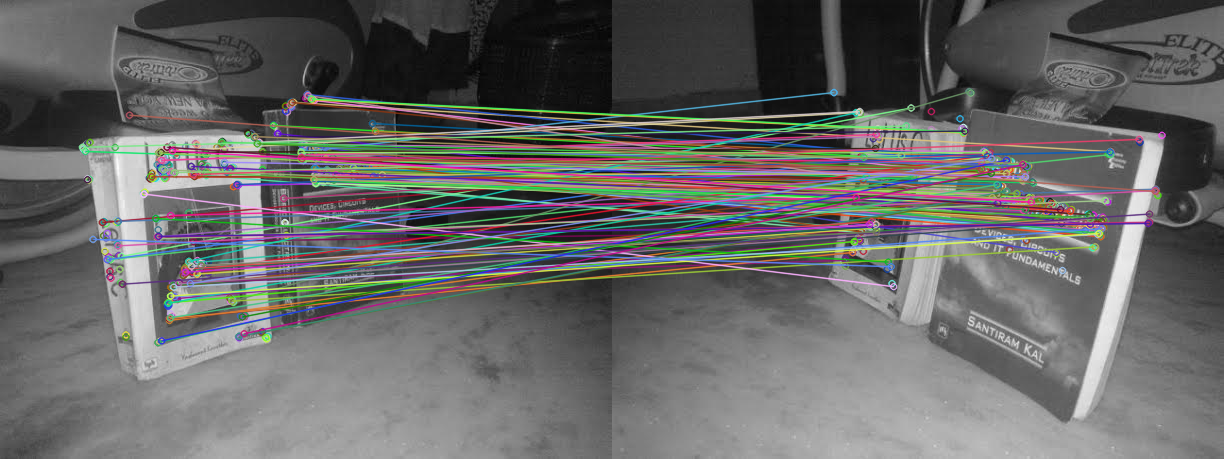

In [ ]:
#feature matching với BRIEF descriptor và Brute-Force Matcher
feature_matching(img_10, img_11, descriptor_type='BRIEF', matcher_type='BF')

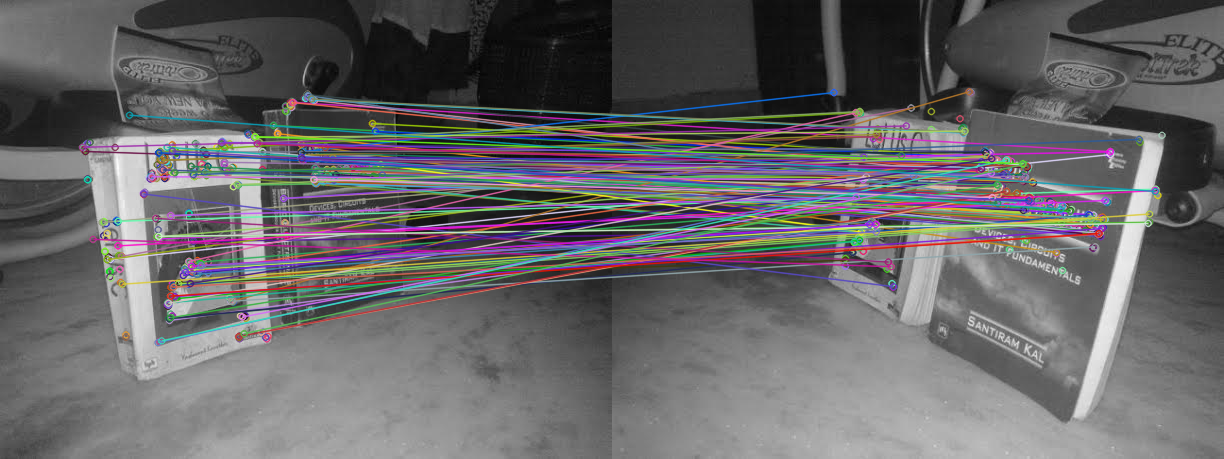

In [ ]:
# feature matching với ORB descriptor và Brute-Force Matcher
feature_matching(img_10, img_11, descriptor_type='ORB', matcher_type='BF')

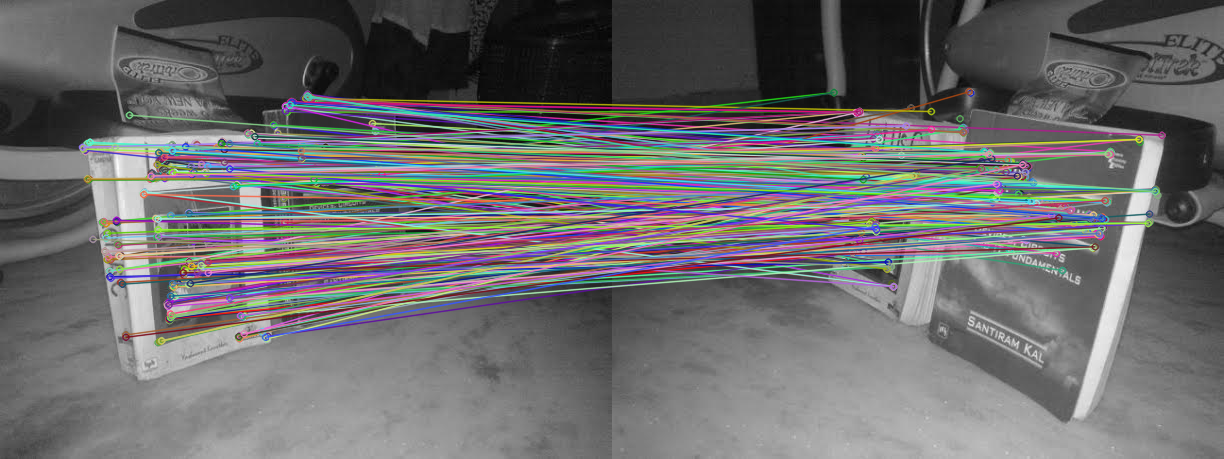

In [ ]:
# feature matching với BRIEF descriptor và FLANN Matcher
feature_matching(img_10, img_11, descriptor_type='BRIEF', matcher_type='FLANN')

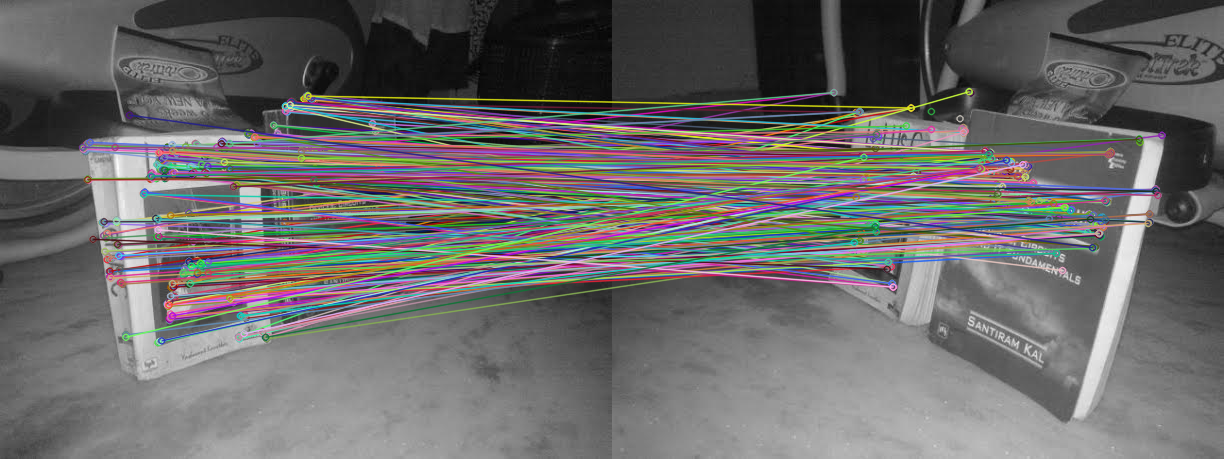

In [ ]:
# feature matching với ORB descriptor và FLANN Matcher
feature_matching(img_10, img_11, descriptor_type='ORB', matcher_type='FLANN')